# Exploratory Data Analysis

- Here, first we'll focus on performing both Uni-Variate and Bi-Variate analysis on the given features
- Secondly, we shall focus on finding the most used words using Wordcloud
- Finally, we shall perform Sentiment Analysis on the reviews using NLTK and AFINN 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Loading the data from the csv file

df = pd.read_csv('BA_reviews_forage_clean.csv', index_col=0)
df.head()

reviews  stars        date  \
0  ✅ Trip Verified |  My flight on on 12 May 2023...      1  2023-06-29   
1  Not Verified |  Cairo is a 5 hour flight and B...      2  2023-06-29   
2  ✅ Trip Verified |  After travelling London to ...      1  2023-06-27   
3  ✅ Trip Verified |  My luggage was mis-tagged i...      1  2023-06-27   
4  ✅ Trip Verified |  The airline lost my luggage...      1  2023-06-25   

                country                                             corpus  
0  United Arab Emirates  trip verify flight may got delay hour minute r...  
1        United Kingdom  not verify cairo hour flight ba consider short...  
2        United Kingdom  trip verify travel london madrid british airwa...  
3         United States  trip verify luggage mis tag dallas way cairo v...  
4         United States  trip verify airline lose luggage absolutely aw...

In [3]:
df['date'] = pd.to_datetime(df['date'])

# Univariate Analysis

# Ratings

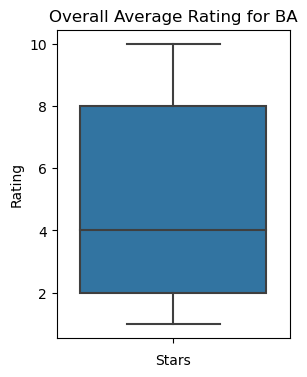

In [4]:
# Visualizing the Overall Rating using Boxplot

plt.figure(figsize=(3,4))
sns.boxplot(y = df['stars'])
plt.title('Overall Average Rating for BA')
plt.ylabel('Rating')
plt.xlabel('Stars')
plt.show()

In [5]:
print('Overall Average Rating for BA based on all reviews = ',round(df['stars'].mean(),2))

Overall Average Rating for BA based on all reviews =  4.78


In [6]:
df['stars'].value_counts()

1     804
2     410
3     396
8     354
10    318
7     308
9     305
5     266
4     242
6     185
Name: stars, dtype: int64

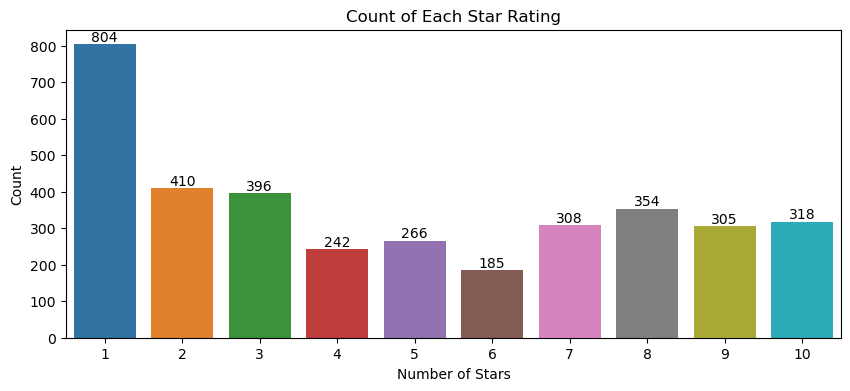

In [7]:
plt.figure(figsize=(10,4))
ax = sns.barplot(data=df, y = df['stars'].value_counts().values, x = df['stars'].value_counts().index)
plt.title('Count of Each Star Rating')
plt.xlabel('Number of Stars')
plt.ylabel('Count')
plt.bar_label(ax.containers[0])
plt.show()

- We can observe that most ratings given are 1 star
- 2 and 3 star reviews occupy a good percentage
- 6 star rating is the lowest by count, given by the customers

# Country

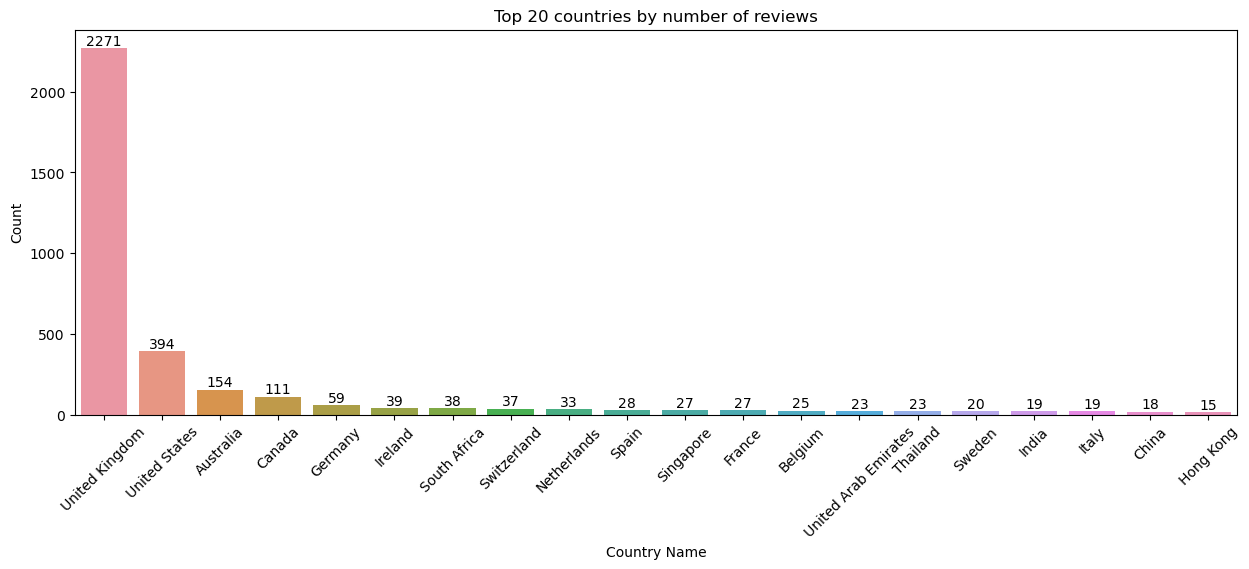

In [8]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=df, y = df['country'].value_counts().head(20).values, x = df['country'].value_counts().head(20).index)
plt.title('Top 20 countries by number of reviews')
plt.xlabel('Country Name')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.bar_label(ax.containers[0])
plt.show()

- United Kingdom has the most reviews coming from. It co-relates with the fact that BA operates from UK as the base as the company is based from UK

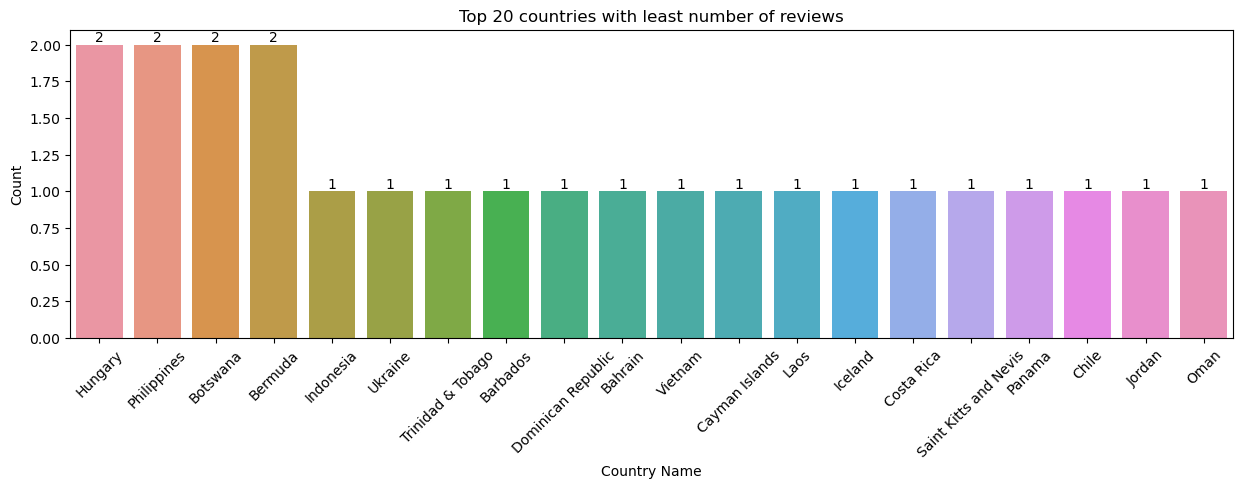

In [9]:
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df, y = df['country'].value_counts().tail(20).values, x = df['country'].value_counts().tail(20).index)
plt.title('Top 20 countries with least number of reviews')
plt.xlabel('Country Name')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.bar_label(ax.containers[0])
plt.show()

# Date

In [10]:
df['date'].dt.strftime('%B').value_counts()

June         356
October      351
May          328
January      320
November     315
September    299
April        292
July         292
December     281
August       274
March        262
February     218
Name: date, dtype: int64

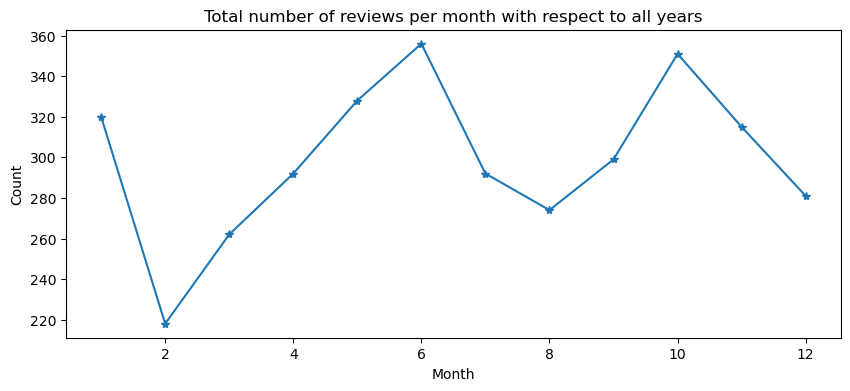

In [11]:
plt.figure(figsize=(10,4))
df['date'].dt.month.value_counts().sort_index(ascending=True).plot(kind='line',marker = '*')
plt.title('Total number of reviews per month with respect to all years')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

- June(6) and October(8) seems to be the time when most people travel in BA
- It can be attributed to the fact that it is a time period where a lot of people travel to spend their holidays
- On the contrary, low review counts on months like Feb and March might also mean that the service from BA was either not too great or too bad enough that customers did not bother about giving their reviews.

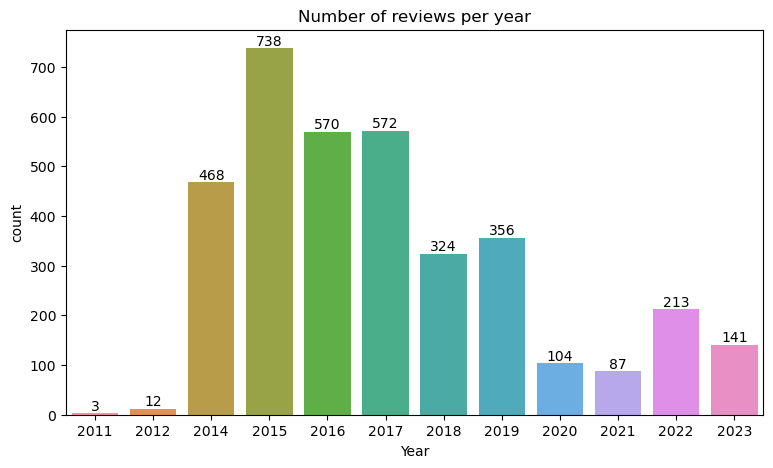

In [12]:
plt.figure(figsize=(9,5))
ax = sns.countplot(x = df['date'].dt.year)
plt.title('Number of reviews per year')
plt.xlabel('Year')
plt.bar_label(ax.containers[0])
plt.show()

- Low count of reviews in years 2011 and 2012 can be related to the fact that there is very less data present for that time period
- Years 2020 and 2021 saw a huge drop which could be related to the rise of Covid-19 pandemic due to which all international passenger services were stopped for most part of the year

# Bivariate

# Country vs Rating

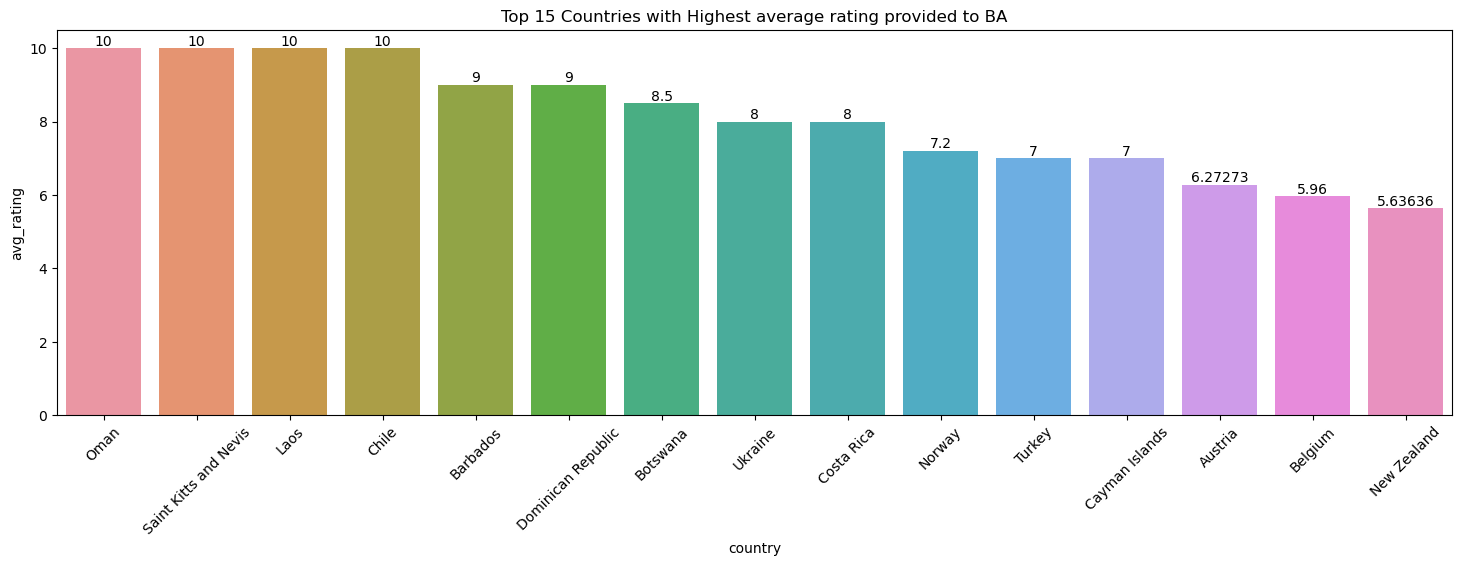

In [13]:
dg = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()
dg.rename(columns={'stars':'avg_rating'}, inplace=True)

plt.figure(figsize=(18,5))
ax = sns.barplot(x='country', y='avg_rating', data=dg.head(15))
plt.title("Top 15 Countries with Highest average rating provided to BA")
plt.xticks(rotation = 45)
plt.bar_label(ax.containers[0])
plt.show()

- Most of the very high rating can be attributed to the fact of having low count of reviews from that country
- By havng a look at the plots in Uni-Variate 'Country' analysis, we can see that countries like Oman, Chille, Costa Rica etc. have only about 1-2 reviews on the whole.
- Similarly for the plot below

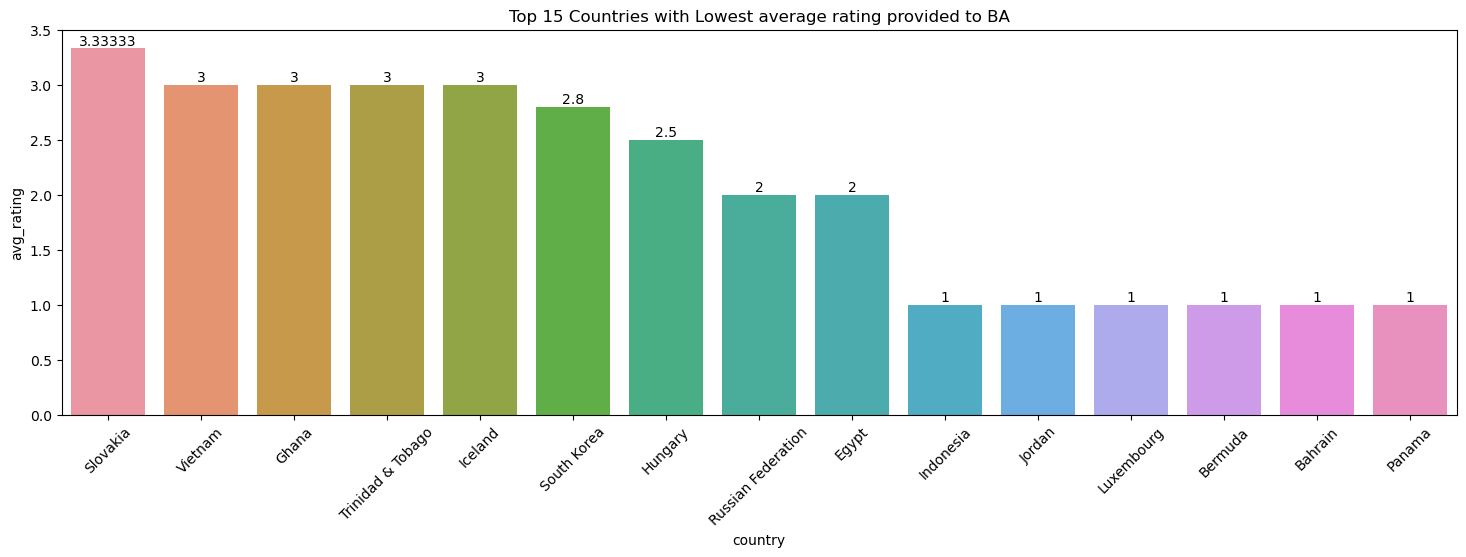

In [14]:
dg = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()
dg.rename(columns={'stars':'avg_rating'}, inplace=True)

plt.figure(figsize=(18,5))
ax = sns.barplot(x='country', y='avg_rating', data=dg.tail(15))
plt.title("Top 15 Countries with Lowest average rating provided to BA")
plt.xticks(rotation = 45)
plt.bar_label(ax.containers[0])
plt.show()

# Date vs Rating

In [15]:
plt.figure(figsize=(15,6))
ax = sns.countplot(hue = df['stars'], x = df['date'].dt.year)
plt.title('Share of each star rating for each year')
plt.xlabel('Year')
plt.ylabel('Count of each star rating')
plt.bar_label(ax.containers[0])
plt.show()

- This plot shows us that, 1 star rating has the most shares throught all the years.
- Peak 1 star reviews are in year 2017. Actions taken that year by the management must be scrutinized properly
- 2023 should also be looked into, crossing 6 months yet majority ratings are 1 star. BA should work on the current feedbacks ASAP.

In [16]:
plt.figure(figsize=(10,4))
ax = sns.barplot(y = df['stars'], x = df['date'].dt.year)
plt.title('Average Star Rating per year')
plt.xlabel('Year')
plt.ylabel('Average Star Rating')
plt.bar_label(ax.containers[0])
plt.show()

- We can confirm that high star rating in 2011 is due to low count of entries at that time
- The year with the most entries is 2015 which also has the 3rd highest overall rating for a year
- 2023 rating is bad with 3.35, eventhough its been only 6 months till now


* Ratings in different time period

In [17]:
# Throught the whole period of the data according to each month

df.groupby(df['date'].dt.month)['stars'].mean()

date
1     4.953125
2     4.697248
3     4.599237
4     4.702055
5     4.948171
6     4.418539
7     4.770548
8     4.635036
9     4.903010
10    4.945869
11    5.076190
12    4.576512
Name: stars, dtype: float64

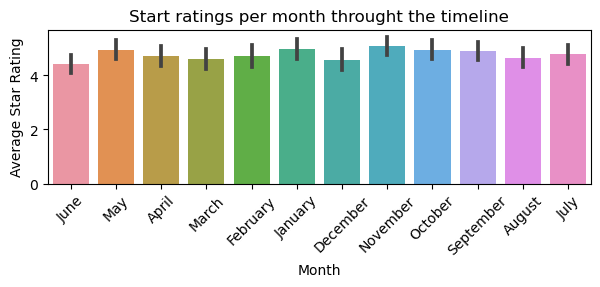

In [18]:
plt.figure(figsize=(7,2))
sns.barplot(x = df['date'].dt.strftime('%B'), y = df['stars'])
plt.title('Start ratings per month throught the timeline')
plt.xticks(ticks= [0,1,2,3,4,5,6,7,8,9,10,11], rotation = 45, )
plt.xlabel('Month')
plt.ylabel('Average Star Rating')
plt.show()

- The month with the most positive ratings is November
- The month with the least positive rating is June

In [19]:
# Re-order dataframe according to date from past to present

dg = df.sort_values('date')

In [20]:
plt.figure(figsize=(7,3))
sns.lineplot(x = dg['date'].dt.strftime('%Y'), y = dg['stars'], markers='*')
plt.title('Trend')
plt.xlabel('Year')
plt.ylabel('Average rating per Year')
plt.show()

- The time period between 2017 to 2019 shows that BA did work on the feebacks and improve, but only till 2020.
- The downward line plot from 2020 to 2023 shows a pretty degrading trend for the company since Covid-19.

In [21]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

- An advance plot to help look with more detail about the number of reviews and it's ratings in a time series

# NLP

In [24]:
import nltk
from nltk.corpus import stopwords

# Start with one review:
reviews = " ".join(df.corpus)

stopwords = set(stopwords.words('english'))

In [25]:
# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=800,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- In the above wordcloud, we observe some words like "aircraft", "could", "even" that doesn't give an idea of whether a review is positive of negative.
- So, we remove them by adding them into the list of stopwords

In [26]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)

stopwords = set(stopwords.words('english'))
stopwords.update(["ba", "flight", "british", "airway", "airways" "airline", "plane", "told", "also", "passenger", 'business', 
                  'class', "london", "heathrow", "aircraft", "could", "even", "would", 'fly', 'trip', 'verify'])

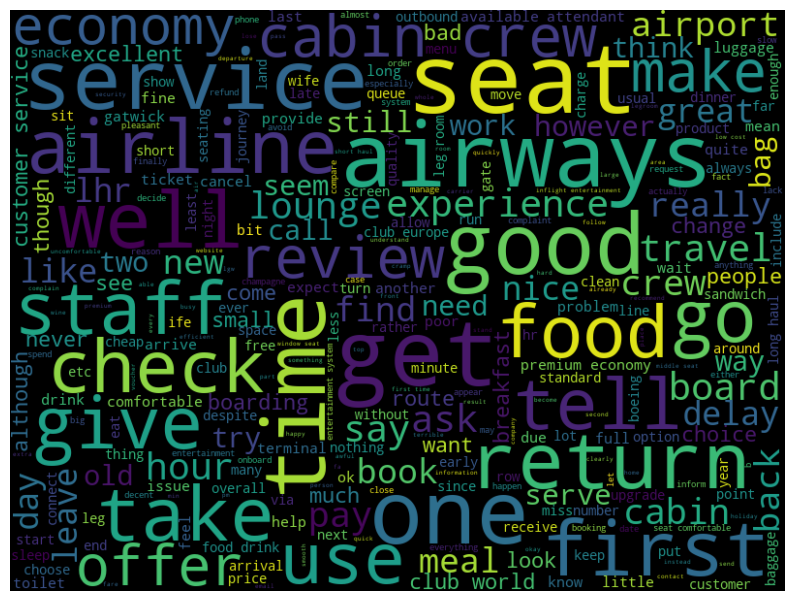

In [27]:
# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=800,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Word Frequency with Ngrams

In [28]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger", "u", "london", "airway", "british", "airline",
                                           "heathrow","plane", "lhr","review", 'I', 'fly', 'trip','verify'])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

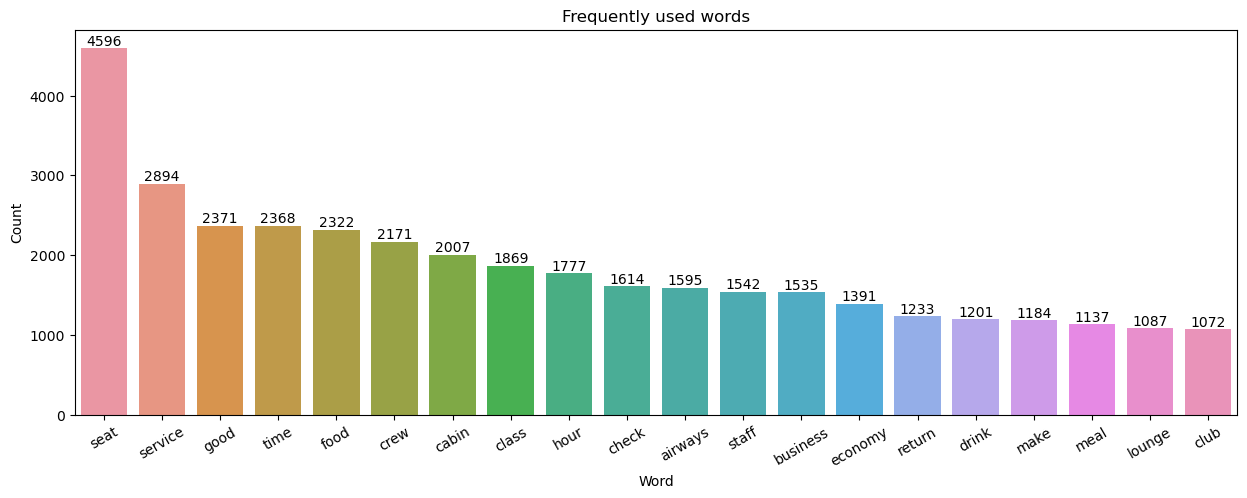

In [29]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,5))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.title('Frequently used words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

- Seats, service, time are some of the most frequently found words.
- These words being used so many times could eith mean something praise worthy or totally bad about what they refer to
- We shall further split these words catogorizing them based on the ratings these reviews were associated with.
- By doing so, we would get a better idea and context about the use of those words

In [30]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,9))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax

get_freq_dist(new_words,5)
plt.show()

* Seperating the word frequency based on the 'Star rating' given

In [31]:
bad_ratings = df[df['stars'].isin([1,2,3])]
avg_ratings = df[df['stars'].isin([4,5,6])]
good_ratings = df[df['stars'].isin([7,8,9,10])]

bad_review = " ".join(bad_ratings['corpus'])
avg_review = " ".join(avg_ratings['corpus'])
good_review = " ".join(good_ratings['corpus'])

#split the text of all reviews into a list of words
bad_remarks = bad_review.split(" ")
avg_remarks = avg_review.split(" ")
good_remarks = good_review.split(" ")

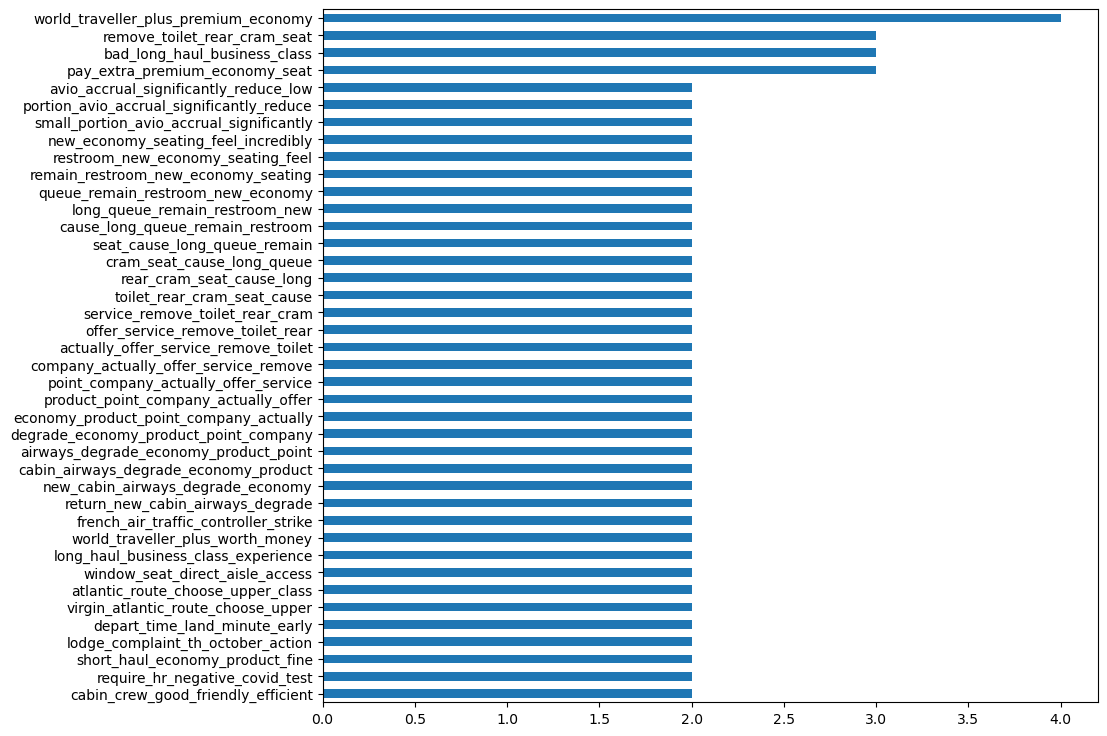

In [32]:
new_good_words = [word for word in good_remarks if word not in stopwords]

get_freq_dist(new_good_words,5)
plt.show()

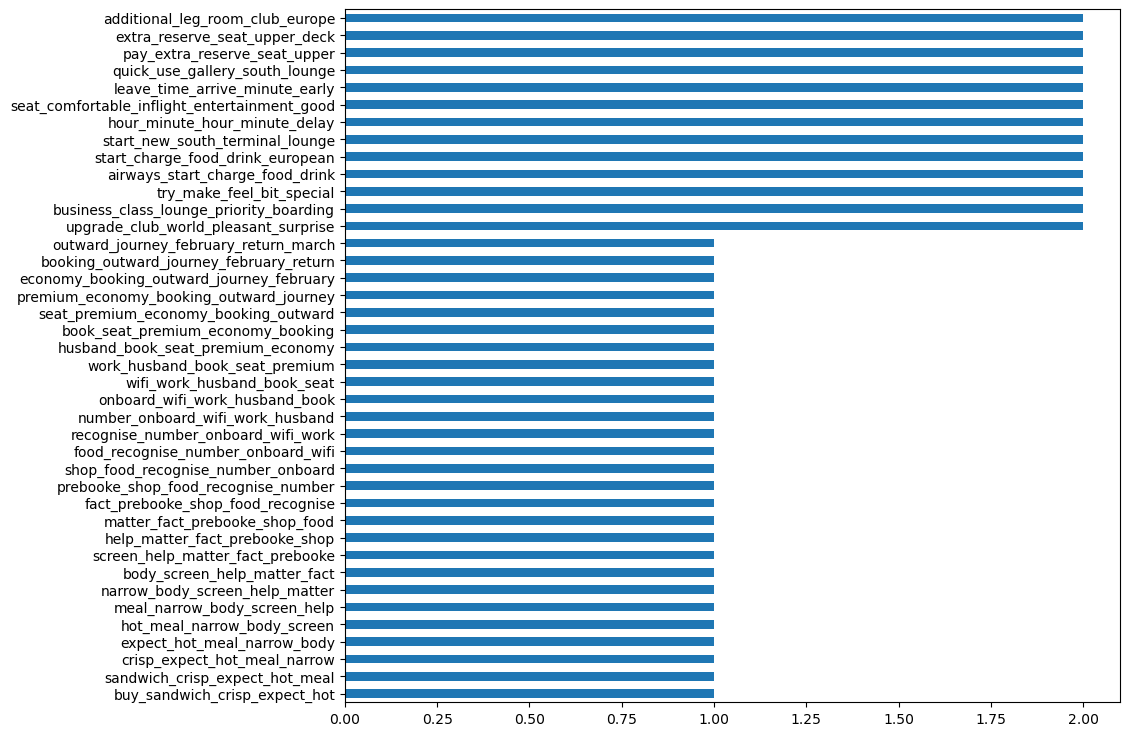

In [33]:
new_avg_words = [word for word in avg_remarks if word not in stopwords]

get_freq_dist(new_avg_words,5)
plt.show()

In [34]:
new_bad_words = [word for word in bad_remarks if word not in stopwords]

get_freq_dist(new_bad_words,5)
plt.show()

- The above 3 plots gives us an average idea about what these words mean together based on the ratings the customer gave

# Analysing Sentiment using NLTK

In [35]:
import nltk

In [36]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [37]:
vds = SentimentIntensityAnalyzer()

#set a column Polarity with all 0 values initially
df['label'] = 0
    
for i in range(len(df.corpus)):
    
    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0

In [38]:
df.label.value_counts()

 1    1956
-1    1493
 0     139
Name: label, dtype: int64

- A score of 1 indicates a high degree of positive sentiment in the analyzed text. It implies that the text contains predominantly positive words and conveys a positive overall sentiment.
- A score of -1 indicates a high degree of negative sentiment in the analyzed text. It suggests that the text contains predominantly negative words and conveys a negative overall sentiment.
- A score of 0 suggests that the analyzed text has a neutral sentiment. It means that the text doesn't strongly express either positive or negative emotions.

# Analysing Sentiment using Textblob

In [39]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [40]:
print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2506 number of reviews between -0.2 and 0.2 polarity score
1468 number of reviews between -0.1 and 0.1 polarity score


- Polarity score is given between -0.1 to 0.1.
- Closer the value to -0.1, indicates negative review 
- Closer the value to 0.1, indicates positive value. 
- If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is negative, we are left with 2286 reviews that lies in the neutral zone. 

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names_out()

In [42]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [43]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0          seat          2132.7        flight          1255.4           bag   
1           not          1636.9           not          1167.6        flight   
2         class           754.6            ba           767.9        london   
3            ba           725.0           get           558.5         delay   
4          food           716.6          tell           470.2       luggage   
5       economy           694.3           day           468.6        verify   
6      business           618.5            no           466.2           not   
7         cabin           584.2          hour           464.7          hour   
8           fly           578.2          call           457.0         check   
9        flight           555.6         would           424.9          trip   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0           270.1           not          2355.4          good           929.4   
1           214.3        flight          1919.2        flight           876.1   
2           126.6            ba          1643.5          club           454.7   
3           102.1          seat          1293.3          crew           416.9   
4            93.1            no          1174.8            ba           404.4   
5            85.2       airline           976.5         cabin           403.3   
6            82.1           fly           847.2          seat           380.5   
7            77.4       service           822.8          food           372.8   
8            71.4       british           759.3     excellent           360.4   
9            59.4         class           663.0       service           331.7   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words  \
0        sister            11.8        flight          2056.2        flight   
1           ask             7.3           not           960.7       service   
2          beer             5.6          time           815.6            ba   
3        answer             4.5          crew           776.4           not   
4       partner             4.2         check           636.7          food   
5       contain             4.2            ba           630.2          seat   
6         lacto             4.1            no           566.3          crew   
7        beside             4.1         delay           501.9        london   
8          nose             3.9          hour           489.5        verify   
9          stow             3.8      heathrow           486.6          good   

  Topic 7 weights  
0           732.0  
1           702.6  
2           580.8  
3           482.2  
4           478.3  
5           476.3  
6           416.2  
7           360.8  
8           344.0  
9           321.0

# Sentiment Analysis usinf AFINN

In [44]:
from afinn import Afinn
af = Afinn()

In [45]:
corpus = df['corpus']

In [46]:
sentiment_scores = [af.score(text) for text in corpus]

sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [47]:
dfs = pd.DataFrame([list(df['country']), sentiment_scores, sentiment_category]).T

In [48]:
dfs.columns = ['country', 'sentiment_score', 'sentiment_category']

In [49]:
dfs['sentiment_score'] = dfs.sentiment_score.astype('float')
dfs.head()

country  sentiment_score sentiment_category
0  United Arab Emirates            -13.0           negative
1        United Kingdom             -7.0           negative
2        United Kingdom             -1.0           negative
3         United States             -4.0           negative
4         United States             -8.0           negative

In [50]:
dfs.groupby(by=['country']).describe().head()

sentiment_score                                                   
                    count       mean        std   min  25%   50%   75%   max
country                                                                     
Argentina             6.0  -1.500000   2.738613  -5.0 -3.5  -1.5   0.5   2.0
Australia           154.0   3.376623  10.295045 -24.0 -4.0   3.0  10.0  28.0
Austria              11.0  14.454545  15.055654 -12.0  3.5  17.0  24.0  37.0
Bahrain               1.0   3.000000        NaN   3.0  3.0   3.0   3.0   3.0
Barbados              1.0   4.000000        NaN   4.0  4.0   4.0   4.0   4.0

In [51]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='country', y="sentiment_score",  hue='country', data=dfs.head(30), ax=ax1)
bp = sns.boxplot(x='country', y="sentiment_score", hue='country', data=dfs.head(30), palette="Set2", ax=ax2)
plt.xticks(rotation =45)
t = f.suptitle('Visualizing Sentiment', fontsize=14)

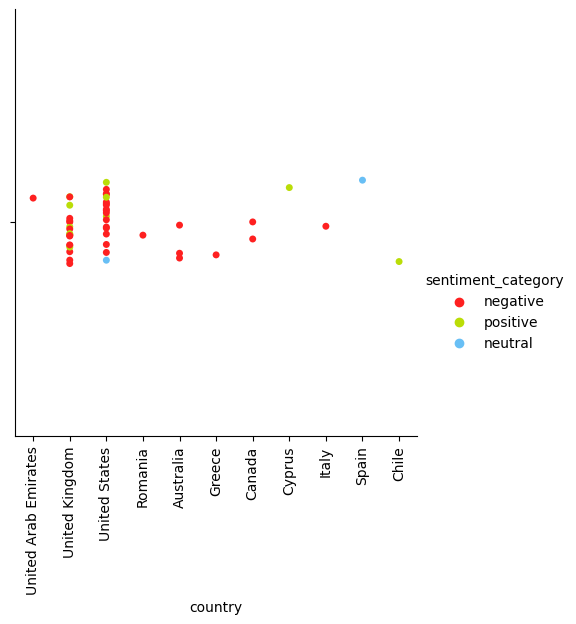

In [52]:
sns.catplot(x="country", hue="sentiment_category", data=dfs.head(50), kind = 'strip', palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})
plt.xticks(rotation=90)
plt.show()

# Most positive and negative review as per country

In [53]:
dfs[dfs['country'] =='United Kingdom']['sentiment_score'].sort_values()

751    -36.0
3539   -34.0
1392   -33.0
2043   -29.0
2461   -28.0
        ... 
2408    54.0
3057    61.0
979     64.0
1270    68.0
444     72.0
Name: sentiment_score, Length: 2271, dtype: float64

In [54]:
pos_idx = dfs[(dfs['country']=='United Kingdom') & (dfs.sentiment_score == 72)].index[0]

neg_idx = dfs[(dfs['country']=='United Kingdom') & (dfs.sentiment_score == -36)].index[0]

In [55]:
print('Most Negative Review  \n', df.iloc[neg_idx][['reviews']][0], '\t')
print()
print('Most Positive Review  \n ',df.iloc[pos_idx][['reviews']][0])

Most Negative Review  
 ✅ Trip Verified |  London to Nashville. The worst airline Trans-Atlantic. Despite looking forward to flying on this new route to Nashville, British Airways ruined this trip. The flight was delayed by over three hours, whilst they ostensibly replaced the damaged aircraft with an inbound Boeing 787-9 from San Jose. The airplane was filthy dirty in Club Class, which is bad enough having to suffer the awful, dated, Club Class ying-yang facing, narrow seats with divider. Business Class on British Airways is the worst of any airline. The WIFI was out of service. On late arrival in Nashville, my luggage arrived soaking wet, and I was unable to change clothes. On my return to the UK, I contacted British Airways Customer Relations to seek compensation, and got the usual pathetic, mainly computer generated, insincere apology. I am now forced to haggle with British Airways, and endure their woeful so-called Customer Relations department. It is a real shame to witness the d